In [1]:
import keras
from keras.layers import SimpleRNN

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [6]:
max_features = 1000
maxlen = 500   
batch_size = 32

In [8]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [9]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


In [10]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)


input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [11]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 32s 196ms/step - loss: 0.6858 - acc: 0.5334 - val_loss: 0.6674 - val_acc: 0.6052
Epoch 2/10
157/157 [==============================] - 30s 190ms/step - loss: 0.5049 - acc: 0.7725 - val_loss: 0.5542 - val_acc: 0.7454
Epoch 3/10
157/157 [==============================] - 29s 184ms/step - loss: 0.4165 - acc: 0.8183 - val_loss: 0.4399 - val_acc: 0.8164
Epoch 4/10
157/157 [==============================] - 29s 184ms/step - loss: 0.3704 - acc: 0.8431 - val_loss: 0.5312 - val_acc: 0.7260
Epoch 5/10
157/157 [==============================] - 29s 187ms/step - loss: 0.3535 - acc: 0.8506 - val_loss: 0.4446 - val_acc: 0.8220
Epoch 6/10
157/157 [==============================] - 28s 181ms/step - loss: 0.3289 - acc: 0.8640 - val_loss: 0.4801 - val_acc: 0.7660
Epoch 7/10
157/157 [==============================] - 29s 184ms/step - loss: 0.3036 - acc: 0.8763 - val_loss: 0.4607 - val_acc: 0.7938
Epoch 8/10
157/157 [==============================] - 2

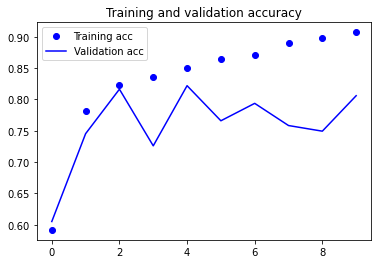

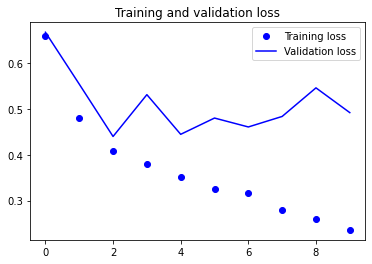

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 65s 401ms/step - loss: 0.6326 - acc: 0.6446 - val_loss: 0.4809 - val_acc: 0.7698
Epoch 2/10
157/157 [==============================] - 62s 398ms/step - loss: 0.4022 - acc: 0.8277 - val_loss: 0.4049 - val_acc: 0.8238
Epoch 3/10
157/157 [==============================] - 63s 403ms/step - loss: 0.3594 - acc: 0.8510 - val_loss: 0.3682 - val_acc: 0.8454
Epoch 4/10
157/157 [==============================] - 63s 400ms/step - loss: 0.3388 - acc: 0.8609 - val_loss: 0.3987 - val_acc: 0.8222
Epoch 5/10
157/157 [==============================] - 63s 400ms/step - loss: 0.3313 - acc: 0.8623 - val_loss: 0.3503 - val_acc: 0.8536
Epoch 6/10
157/157 [==============================] - 62s 397ms/step - loss: 0.3236 - acc: 0.8643 - val_loss: 0.3360 - val_acc: 0.8628
Epoch 7/10
157/157 [==============================] - 62s 398ms/step - loss: 0.3137 - acc: 0.8731 - val_loss: 0.3275 - val_acc: 0.8630
Epoch 8/10
157/157 [==============================] - 6

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


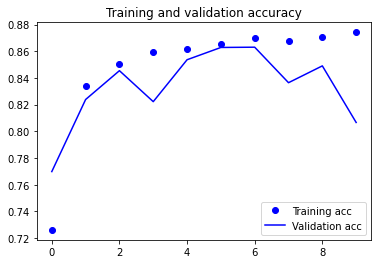

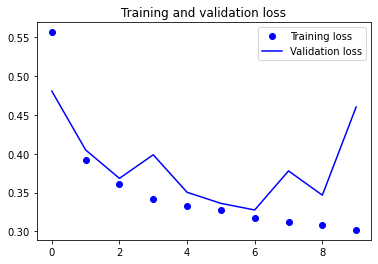

In [17]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()